In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
car_raw_df = pd.read_csv("./data/car-evaluation-data-set/car_evaluation.csv", header=0, sep=",")
column_names = ['buying_price', 'maint_cost', 'n_doors', 'n_person', 'lug_boot', 'safety', 'decision']
car_raw_df.columns = column_names

In [13]:
car_raw_df.head()

,buying_price,maint_cost,n_doors,n_person,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [15]:
X = car_raw_df.drop("decision", axis=1)
y = car_raw_df["decision"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [20]:
encoder = ce.OrdinalEncoder(cols=['buying_price', 'maint_cost', 'n_doors', 'n_person', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
x_test  = encoder.transform(X_test)

In [24]:
X_train.shape, X_test.shape

((1208, 6), (519, 6))

In [74]:

def performance_dataframe(n_estimators, X, y) -> pd.DataFrame:   
    perform_dict = {"test" : [], "train": []}
    
    for i in range(1, n_estimators+1):
        # Spliting data, 30% for training and 70% for testing.
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
        
        # Encoding data
        encoder = ce.OrdinalEncoder(cols=['buying_price', 'maint_cost', 'n_doors', 'n_person', 'lug_boot', 'safety'])
        X_train = encoder.fit_transform(X_train)
        X_test  = encoder.transform(X_test)
        
        # Creating Random Forest model
        random_forest = RandomForestClassifier(n_estimators=i)
        
        # Training model
        random_forest.fit(X_train, y_train)
        
        # Predicting
        y_pred_test = random_forest.predict(X_test)
        y_pred_train = random_forest.predict(X_train)
        
        # Metrics
        a_test = accuracy_score(y_test, y_pred_test)
        a_train = accuracy_score(y_train, y_pred_train)
        
        perform_dict["test"].append(a_test)
        perform_dict["train"].append(a_train)
        
        # Dataframe
        perform_data = pd.DataFrame(perform_dict).reset_index().rename(columns={"index" : "iteration"})

    return perform_data

def performance_plot(n_estimators, X, y) -> plt.plot:   
    perform_dict = {"test" : [], "train": []}
    
    for i in range(1, n_estimators+1):
        # Spliting data, 30% for training and 70% for testing.
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
        
        # Encoding data
        encoder = ce.OrdinalEncoder(cols=['buying_price', 'maint_cost', 'n_doors', 'n_person', 'lug_boot', 'safety'])
        X_train = encoder.fit_transform(X_train)
        X_test  = encoder.transform(X_test)
        
        # Creating Random Forest model
        random_forest = RandomForestClassifier(n_estimators=i)
        
        # Training model
        random_forest.fit(X_train, y_train)
        
        # Predicting
        y_pred_test = random_forest.predict(X_test)
        y_pred_train = random_forest.predict(X_train)
        
        # Metrics
        a_test = accuracy_score(y_test, y_pred_test)
        a_train = accuracy_score(y_train, y_pred_train)
        
        perform_dict["test"].append(a_test)
        perform_dict["train"].append(a_train)
        
        # Dataframe
        perform_data = pd.DataFrame(perform_dict).reset_index().rename(columns={"index" : "iteration"})
        
    (
        perform_data[["test", "train"]]
        .pipe(
            lambda df: (
                df.test.interpolate(method="linear").plot(color="black", marker="o", alpha=6/9, linestyle="dashed"),
                df.train.interpolate(method="linear").plot(color="red", marker="o", alpha=6/9, linestyle="dashed")
            )
        )
    )

    plt.grid()
    plt.xlabel("Number of iterations")
    plt.ylabel("Performance")
    plt.show()
        
    

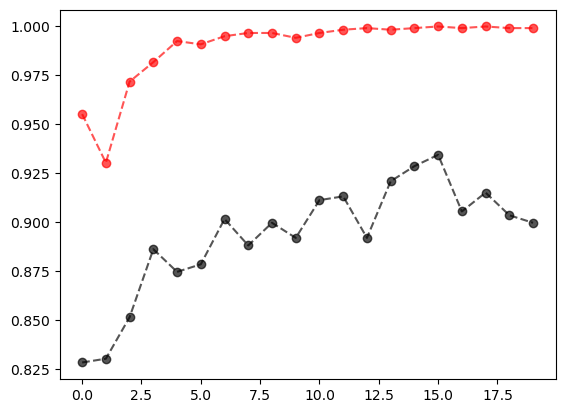

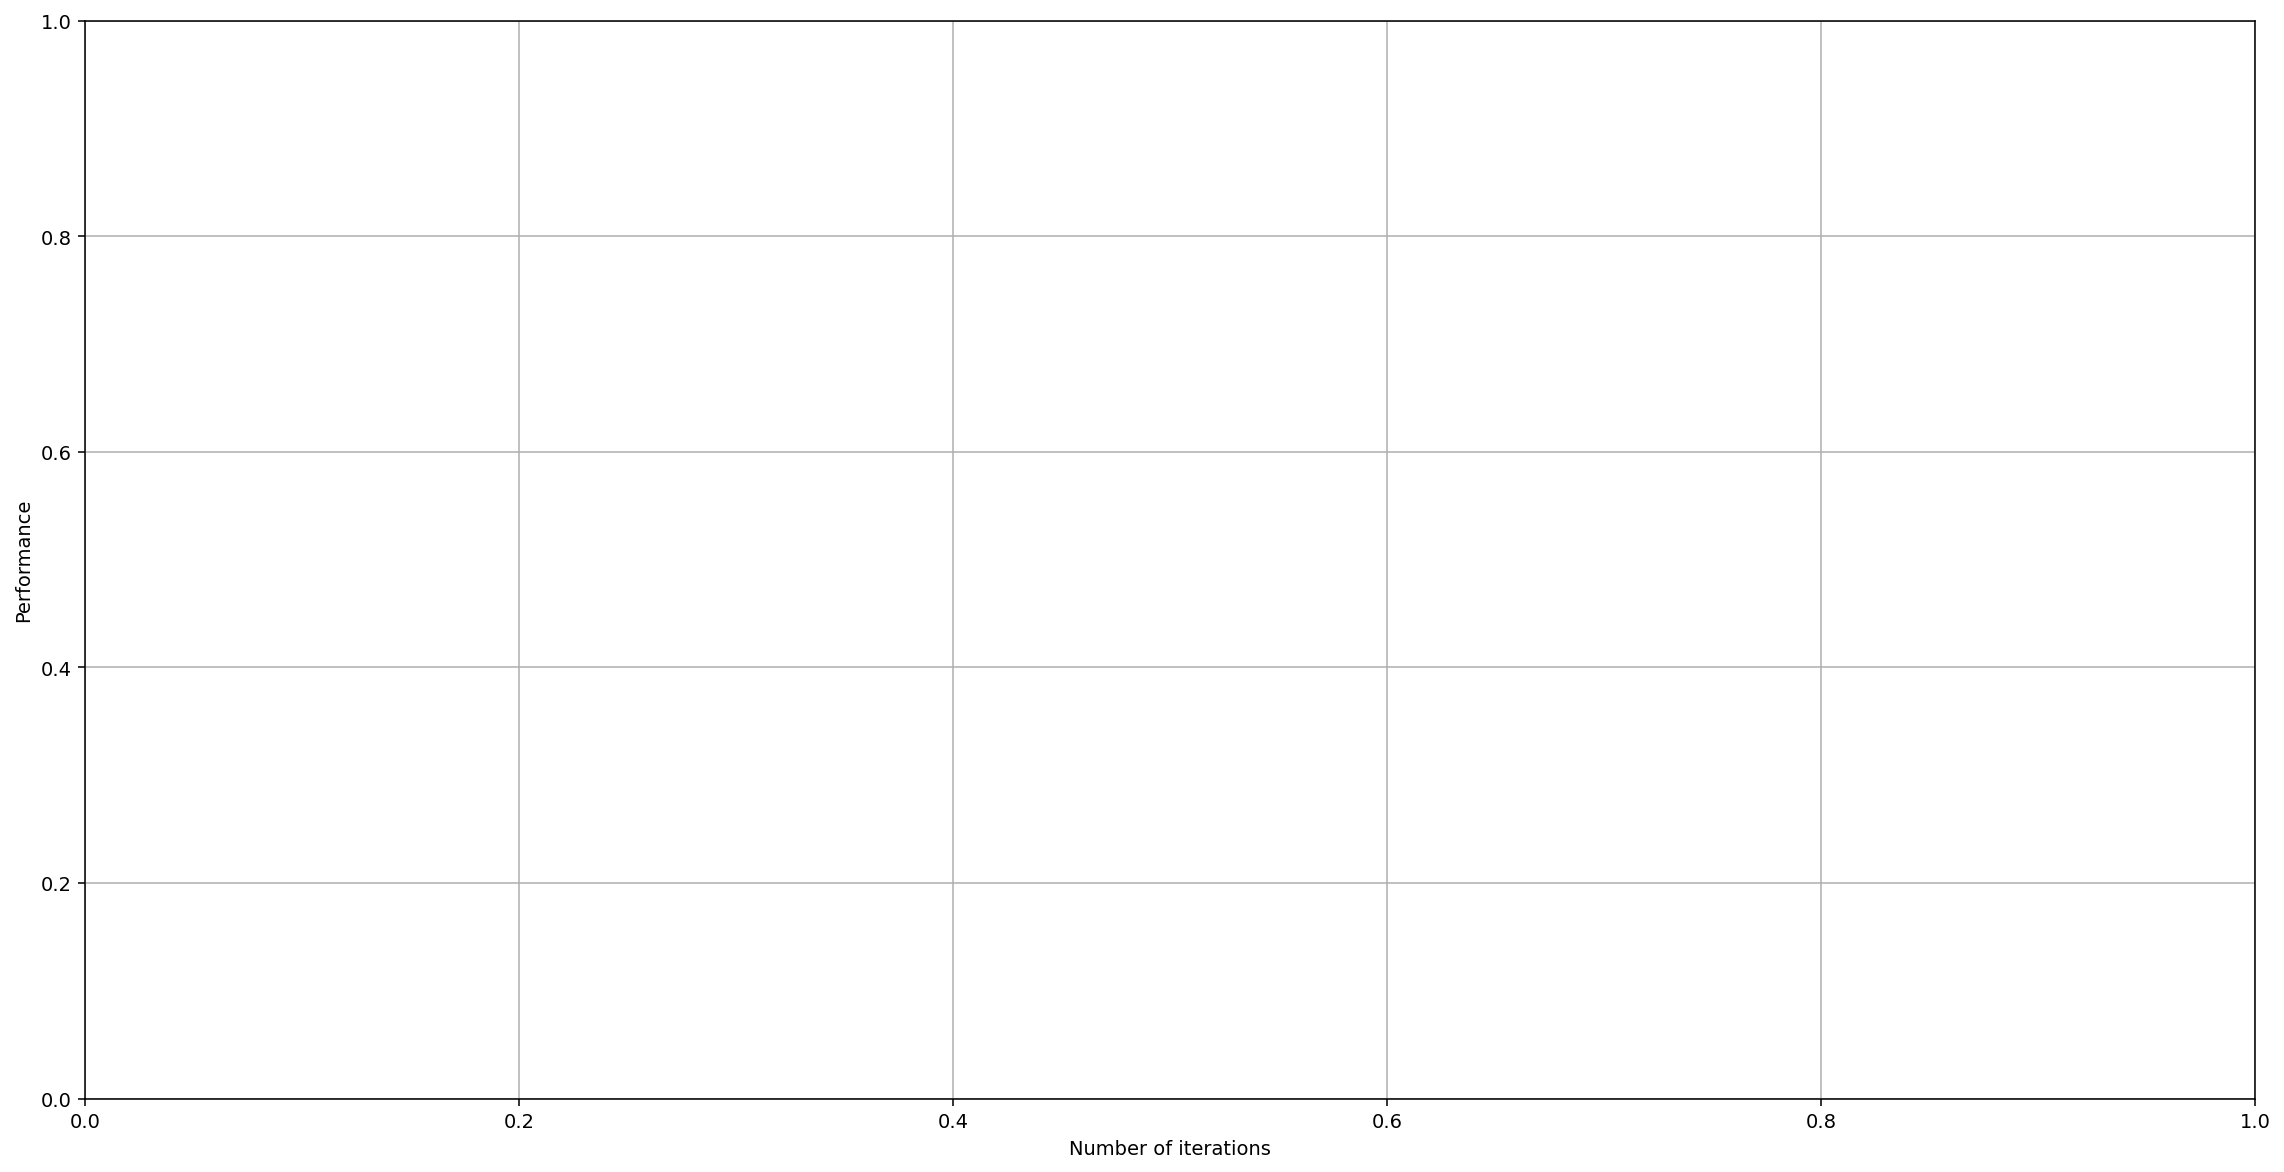

In [75]:
performance_plot(20, X, y)